<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo">
</center>


# Non-Negative Matrix Factorization

Estimated time needed: **45** minutes





You've been hired by a video streaming platform that specializes in kids content. The company would like to ensure that all content on the platform does not infringe on a copyright written material. The company has created an image database of copyrighted material, not only must you detect the same images you must detect similar images. Your  job is to come up with an image retrieval system to find the most similar image to each image in the provided dataset. Because your model is used for legal purposes it must be interpretable, this means it should be able to determine why the images are similar. As a result, you will use Non-Negative Matrix factorization since the factorized matrices can be interpreted as real images. You will use the [Anime Face Dataset](https://www.kaggle.com/datasets/splcher/animefacedataset?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) from kaggle.



<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/fake_cartoon.png" alt="cognitiveclass.ai logo">

<a href="https://www.piratesandprincesses.net/the-story-of-goodtimes-and-their-numerous-disney-knockoffs/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01"> image source</a>


## Table of Contents

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li><a href="#Datasets">Datasets</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="#Defining-Helper-Functions">Defining Helper Functions</a></li>
        </ol>
    </li>
    <li>
        <a href="#Background">Background</a>
        <ol>
               <li><a href="#What's a Non-Negative Matrix Fatorization?">What's a Non-Negative Matrix Fatorization?</a></li>
        </ol>
    </li>
  <li><a href="#Applying Non-Negative Matrix Factorization">Applying Non-Negative Matrix Factorization</a></li>
  <li><a href="#Image Retrieval System">Image Retrieval System</a></li>
   <li><a href="#Exercises">Exercises</a>
       <ol>
            <li><a href="#Exercise 1">Exercise 1</a></li>
            <li><a href="#Exercise 2">Exercise 2</a></li>
            <li><a href="#Exercise 3">Exercise 3</a></li>
            <li><a href="#Exercise 4">Exercise 4</a></li>
            <li><a href="#Exercise 5">Exercise 5</a></li>
        </ol>
    </li>
 </ol>    
     
    
     

## Objectives

After completing this lab you will be able to:

- __Understand__ Basics Matrix operations  such as Matrix addition  , Vector Multiplication，and Eigen decomposition

- __Apply__ Apply these Matrix operations using numpy


***


## Datasets

Download and unzip the **images** dataset:


In [ ]:
!pip install skillsnetwork

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.3 MB/s eta 0:00:00


In [ ]:
import skillsnetwork

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/images.tar.gz"

In [ ]:
await skillsnetwork.prepare(url, overwrite=True)

  0%|          | 0/20006 [00:00<?, ?it/s]

Saved to '.'


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for visualizing the data.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for machine learning and machine-learning-pipeline related functions.


### Installing required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"


you can use  <a href="https://www.sympy.org/en/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01">SymPy </a>this to print matrices


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from os import listdir, getcwd
from os.path import isfile, join
from PIL import Image, ImageOps

In [ ]:
import logging                         # used for debugging and model training progress
from numpy.random import RandomState   # random number generator from numpy
from sklearn.decomposition import NMF  # Non-negative Matrix Factorization (dimensionality reduction)

### Defining Helper Functions


Load train and test set:


In [ ]:
def get_data_matrix(test=False, Length=100, Width=100, mypath="images/"):

  files = [join(mypath, f) for f in listdir(mypath) if isfile(join(mypath, f)) and f[0] != '.']
  if mypath + '/.DS_Store' in files:
    files.remove(mypath + '/.DS_Store')

  if test:
    print("test data")
    files = files[9000:10000]

  else:
    print("training data")
    files = files[0:9000]

  print(len(files))

  X = np.zeros((len(files),Length*Width))       # create empty array (9000, 10000)

  # Iterate 9000 times
  for i, f in enumerate(files):
    img = Image.open(f).resize((Width, Length)) # open image & resize
    img = ImageOps.grayscale(img)               # convert image to grayscale
    I = np.array(img)                           # convert image to numpy array
    X[i, :] = I.reshape(1, -1)                  # flattened and store in X (1, 10000)
  return X

Plot image vectors:


In [ ]:
def reshape_row(x):
    '''
    Shows image reshaping (Length, Width) in grayscale.
    --> Return image.
    '''
    plt.imshow(x.reshape(Length, Width), cmap="gray")

This threshold function outputs an index if the input ```similar_distance``` is grater than or less than ```min_``` and ```max_```.


In [ ]:
def threshold(similar_distance, max_=0.1, min_=0):
    '''
    Get indices of the similar_distance and similar_index data based on similar_distance
    between the defined range (min_ and max_ values).
    --> Return dataset_index and query_index.
    '''
    # Get boolean data from the conditions
    mask = (similar_distance > min_) & (similar_distance < max_)

    # Get indices of the conditions
    dataset_index = np.where(mask)[0] # indices of "True"

    # Get data from the similar_index based on mask
    query_index = similar_index[mask]

    return dataset_index, query_index

Plot dataset images and query images, ```X``` and ```X_q``` are global variables.


In [ ]:
def plot_data_query(dataset_index, query_index, N):
    '''
    Visualizes between training data and testing data based on
    dataset_index and query_index data with N samples.
    - figure_size: (10, 4)
    - figure_grid: (2, 2)
    --> Return image.
    '''
    for data_sample, query_sample in zip(dataset_index[0:N], query_index[0:N]):
        plt.figure(figsize=(10,4))
        plt.subplot(1, 2, 1)
        reshape_row(X[data_sample])     # defined function with training data
        plt.title("dataset sample {}".format(data_sample))
        plt.subplot(1, 2, 2)
        reshape_row(X_q[query_sample])  # defined function with testing data
        plt.title("query sample match {}".format(query_sample))
        plt.show()
        print("-"*90)

In [ ]:
def plot_faces(title, images, n_col, n_row, cmap=plt.cm.gray):
    '''
    Visualize grayscale images in an (n_row, n_col) grid with a horizontal colorbar.
    --> Return image.
    '''

    # Configure subplots
    fig, axs = plt.subplots(nrows = n_row,
                            ncols = n_col,
                            figsize = (2.0 * n_col, 2.3 * n_row),
                            facecolor = 'white',
                            constrained_layout = True) # auto-adjust layout to avoid overlaps

    # Fine-tune padding values for the figure layout only
    fig.set_constrained_layout_pads(w_pad = 0.01, # padding between columns in inches.
                                    h_pad = 0.02, # padding between rows in inches.
                                    hspace = 0,   # relative spacing between rows.
                                    wspace = 0)   # relative spacing between columns.

    # Set title for the whole figure
    fig.suptitle(title, size=16)

    # Loop through axes and images, and plot each image
    for ax, vec in zip(axs.flat, images):
        im = ax.imshow(vec.reshape(image_shape), # image_shape = (64, 64)
                       cmap = cmap,
                       interpolation = 'nearest')
        ax.axis('off')

    # Add colorbar below all images
    fig.colorbar(im,
                 ax = axs,                     # Apply to all subplots
                 orientation = 'horizontal',
                 shrink = 0.99,                # Shrink the bar slightly
                 aspect = 40,                  # Length-to-thickness ratio
                 pad = 0.01)                   # Padding between plots and colorbar

    plt.show()

## Background


### What's a Non-Negative Matrix Factorization?


In Non-Negative Matrix Factorization (NNMF) sometimes called non-negative matrix approximation, a $N x D$ matrix $\mathbf{X}$, where $N$ is the number of samples and $D$ is the dimension of features, contains all non-negative values. In NNMF we construct a non-negative  approximation of $\mathbf{X}$, $\mathbf{\hat{X}}$ such that $\mathbf{\hat{X}}$ is a product of two non-negative matrices $\mathbf{W}$ and $\mathbf{H}$, i.e:

$$\mathbf{\hat{X}}=\mathbf{WH}$$

where the $r$ rows of $\mathbf{H}$ are called the basis, and we are going to represent the matrix $\mathbf{X}$ in terms of this basis.

Each row of $\mathbf{W}$, ${w}_i$ is called an encoding of the corresponding ${x}_i$ in $\mathbf{X}$, which represents "how much" of each basis in $\mathbf{H}$ is to represent ${x}_i$. ${\hat{x}_i}$ is thus a linear combination of the rows of $\mathbf{H}$.


## Applying Non-Negative Matrix Factorization


**Image retrieval** is used for searching and retrieving images from a large database of digital images. Here we would like to find identical or similar  animated faces  for copyright reasons.


Consider the matrix $\mathbf{X}$ where each row is a flattened $100\times 100$ image.


Test `get_data_matrix()` function

In [ ]:
test = False; Length = 100; Width = 100; mypath = "images"

In [ ]:
listdir(mypath)[:3]

['._1570_2001.jpg', '._25979_2009.jpg', '._50607_2015.jpg']

In [ ]:
[f for f in listdir(mypath)][:3]

['._1570_2001.jpg', '._25979_2009.jpg', '._50607_2015.jpg']

In [ ]:
join(mypath, '22929_2008.jpg')

'images/22929_2008.jpg'

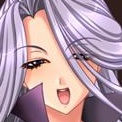

In [ ]:
# Original image size (122, 122)
h = join(mypath, '22929_2008.jpg')
img = Image.open(h)
img # size: (122, 122)

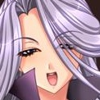

In [ ]:
# Resize image to (100, 100)
img.resize((Width, Length)) # size: (100, 100)

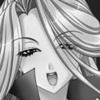

In [ ]:
# Resize image to (100, 100)
ImageOps.grayscale(img.resize((Width, Length))) # size: (100, 100)

In [ ]:
# Color version has 3 dimensions
r_img = img.resize((Width, Length))
I = np.array(r_img)
I.shape # 3-dimensions

(100, 100, 3)

In [ ]:
# Grayscale version has 2 dimensions (no color)
r_img = img.resize((Width, Length))
I = np.array(ImageOps.grayscale(r_img))
I.shape # 2-dimensions

(100, 100)

In [ ]:
[isfile(join(mypath, f)) for f in listdir(mypath)][:3]

[True, True, True]

In [ ]:
len([f for f in listdir(mypath) if f.startswith('.')])

10002

In [ ]:
files = [join(mypath, f) for f in listdir(mypath) if
         isfile(join(mypath, f)) and f[0] != '.']
len(files)

10002

In [ ]:
mypath + '/.DS_Store'

'images/.DS_Store'

In [ ]:
if mypath + '/.DS_Store' in files:
  files.remove(mypath + '/.DS_Store')
if test:
  print("test data")
  files = files[9000:10000]
else:
  print("training data")
  files = files[0:9000]

print(len(files))

training data
9000


In [ ]:
X = np.zeros((len(files), Length * Width))
X.shape

(9000, 10000)

In [ ]:
# Iterate 9000 times
for i, f in enumerate(files):
  img = Image.open(f).resize((Width, Length)) # open image & resize
  img = ImageOps.grayscale(img)               # convert image to grayscale
  I = np.array(img)                           # convert image to numpy array
  X[i, :] = I.reshape(1, -1)                  # flattened and store in X (1, 10000)

In [ ]:
Length, Width = 100, 100
X = get_data_matrix(test=False, Length=100, Width=100, mypath="images")
X.shape

training data
9000


(9000, 10000)

We can apply ```sklearn.decomposition.NMF``` to obtain the  non-negative matrices, i.e. matrices with all non-negative elements, $(\mathbf{W}$, $\mathbf{H})$ whose product approximates the non-negative matrix $\mathbf{X}$.

Consider the following parameters when building a simple NMF object:

```n_components```: int; Number of components, if n_components is not set all features are kept.

```tolfloat```: default=1e-4; Tolerance of the stopping condition.

```max_iter```: int, (default=200); Maximum number of iterations before timing out.


$X≈W⋅H$  
Where:
- *$X$*: Original datashape (n_samples, n_features) → e.g., (9000, 10000)
- *$W$*: Transformed data shape (n_samples, n_components) → e.g., (9000, 10)
- *$H$*: Estimator components shape (n_components, n_features) → e.g., (10, 10000)

Let's select a number of components or basis, namely $r$, for the matrix representation.


In [ ]:
n_components = 10

Initialize our NMF object and fit it to $\mathbf{X}$:


In [ ]:
X.shape # original non-negative dataset

(9000, 10000)

In [ ]:
nmf_estimator = NMF(n_components=n_components, tol=5e-3, max_iter=2000)
nmf_estimator.fit(X)

NMF(max_iter=2000, n_components=10, tol=0.005)

In [ ]:
W = nmf_estimator.transform(X)
W.shape

(9000, 10)

The `.components_` method returns the basis found:


In [ ]:
H = nmf_estimator.components_
H.shape

(10, 10000)

In [ ]:
x = W @ H

In [ ]:
# Check similarity
np.allclose(x, X)

False

In [ ]:
# Check mutuality
np.array_equal(x, X)

False

In [ ]:
# Difference in values
X[1], x[1]

(array([163., 188., 216., ..., 131., 144., 192.]),
 array([220.62813658, 217.64813269, 215.69033929, ..., 181.37571274,
        183.64580481, 186.20878886]))

In [ ]:
# Same in shape
X.shape, x.shape

((9000, 10000), (9000, 10000))

We can reshape the obtained 10 basis into images, and they appear like faces in the dataset:


In [ ]:
len(H[2])

10000

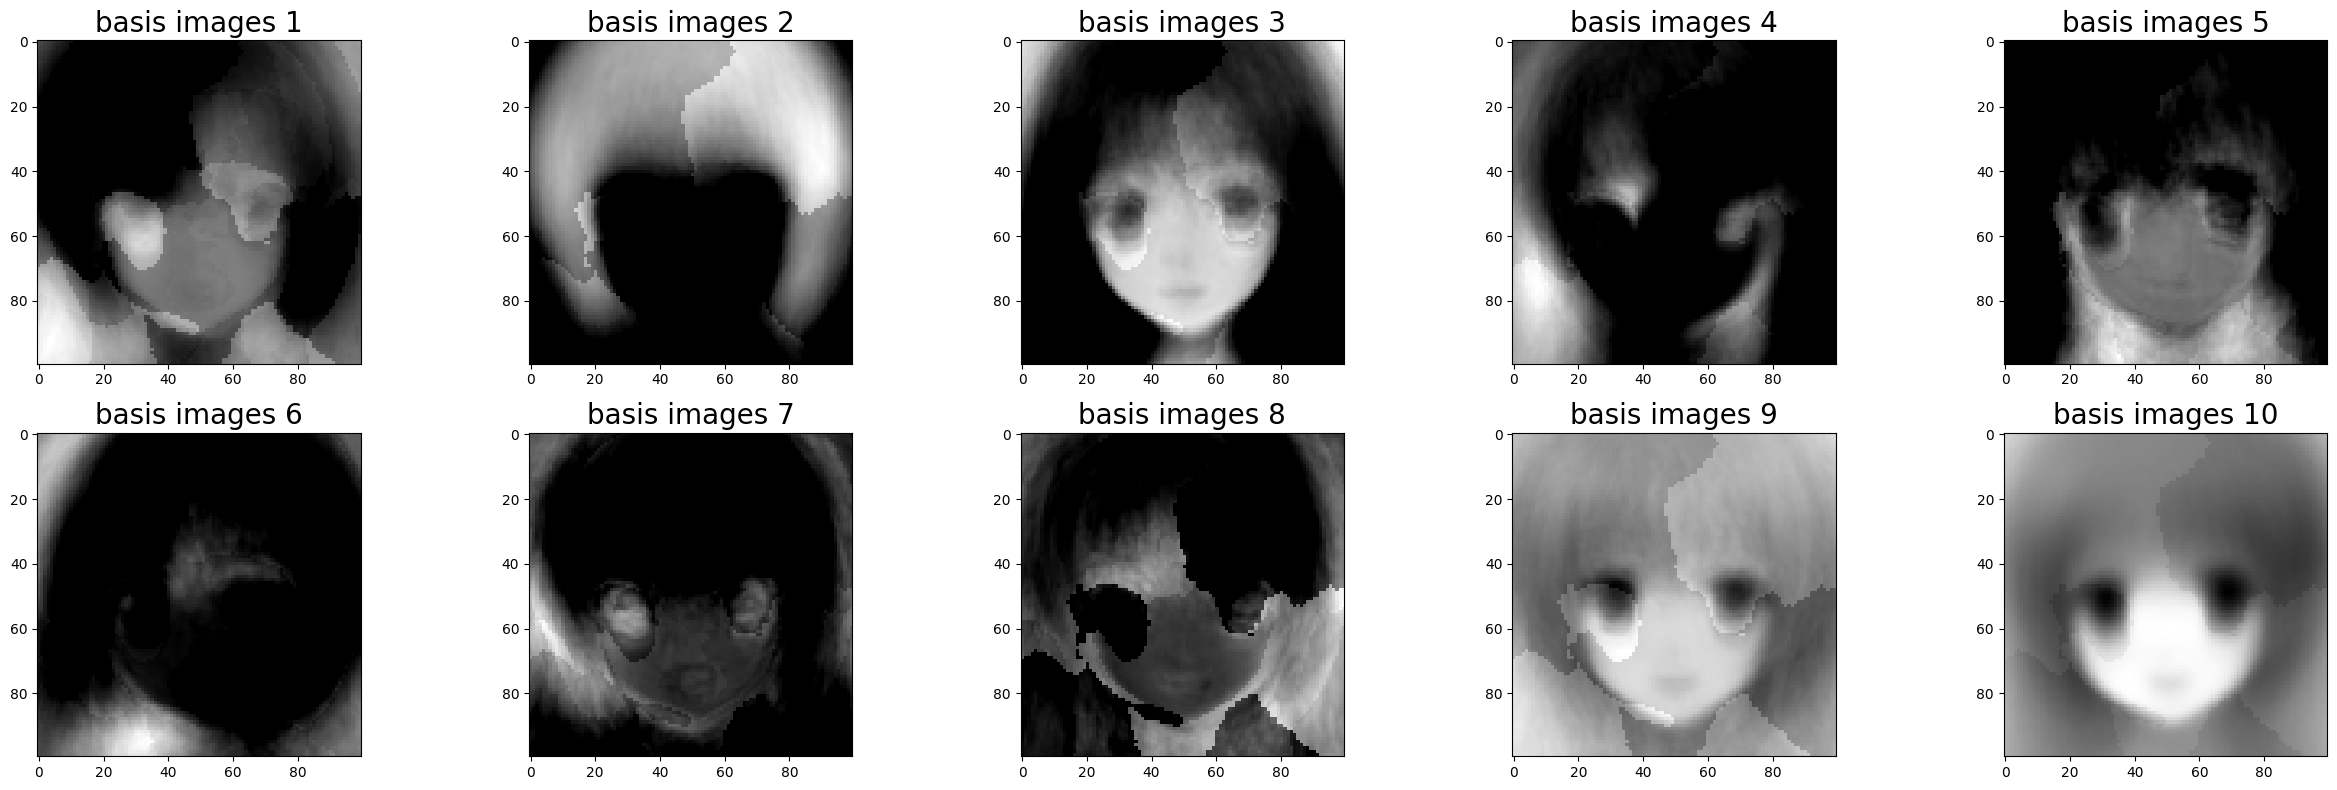

In [ ]:
plt.figure(figsize=(25, 8))
for i, h in enumerate(H): # extract arrays row by row
    plt.subplot(2, 5, i+1)
    reshape_row(h)
    plt.title("basis images {}".format(str(i+1)), fontsize=20)

plt.tight_layout()

We can obtain the encodings of all the images using the **transform** method of the fitted **nmf_estimator**:


In [ ]:
W = nmf_estimator.transform(X)

For each of the 9000 images we have an encoding of dimension 10:


In [ ]:
W.shape

(9000, 10)

The encoding tells you the projection of each image in $\mathbf{X}$ on a particular basis. Here we plot out the encoding magnitude for the $i$th image on each basis.


In [ ]:
i = 0
w = W[i, :]
w

array([0.44965612, 0.12163547, 0.05929425, 0.        , 0.0054083 ,
       0.        , 0.        , 0.13285802, 0.60516724, 0.23406933])

In [ ]:
[f"({n}:{v})" for n,v in zip(range(len(w)), w)]

['(0:0.4496561243915553)',
 '(1:0.12163546657351777)',
 '(2:0.0592942527375538)',
 '(3:0.0)',
 '(4:0.005408296169566777)',
 '(5:0.0)',
 '(6:0.0)',
 '(7:0.13285802306565322)',
 '(8:0.6051672373673163)',
 '(9:0.23406932507396086)']

Text(0.5, 1.0, 'encodings for image 1')

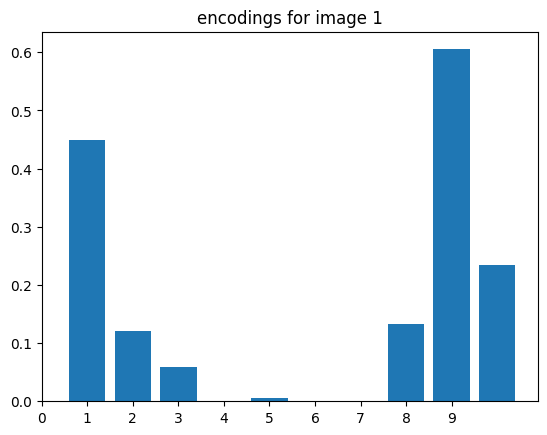

In [ ]:
plt.bar([n+1 for n in range(len(w))], w)
plt.xticks(ticks=range(len(w)))
plt.title("encodings for image {}".format(i+1))

We see that for image 1, the second encoding (index=1) has the highest magnitude, thus basis vector 1 plays a major role in reconstructing image. In contrast, component 8 (index 8, which is the 9th component by human count) has a low weight in the encoding. That means the corresponding basis vector 8 barely contributes to the image. So, when you visualize basis vector 8, it does not resemble the image much.


Text(0.5, 1.0, 'Dissimilar basis 9')

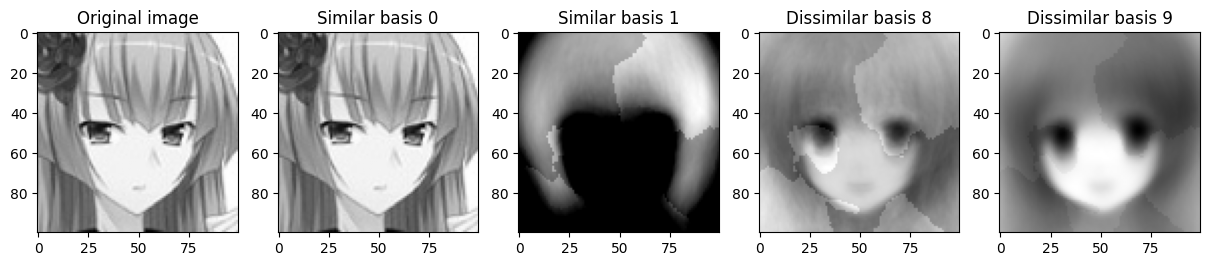

In [ ]:
plt.figure(figsize=(15,4))

plt.subplot(151)                # row1, col5, no1
reshape_row(X[0,:])             # original image (1st image)
plt.title("Original image")

plt.subplot(152)                # row1, col5, no2
reshape_row(X[0,:])             # transformed image (same image)
plt.title("Similar basis 0")

plt.subplot(153)                # row1, col3, no3
reshape_row(H[1,:])             # transformed image (same image)
plt.title("Similar basis 1")

plt.subplot(154)                # row1, col3, no4
reshape_row(H[8,:])             # transformed image (same image)
plt.title("Dissimilar basis 8")

plt.subplot(155)                # row1, col3, no5
reshape_row(H[9,:])             # transformed image (same image)
plt.title("Dissimilar basis 9")

**"X"** ကနေ transformed လုပ်ပြီးရလာတဲ့ **"W"** ထဲမှာ ဘယ် feature (column) ကအနီးစပ်ဆုံး တူလဲဆိုတာကို ပြန် ဆန်းစစ်ကြည့်တာ။

We can perform the inverse transform using the method **inverse_transform** to get $\mathbf{\hat{X}}$, the approximation of $\mathbf{X}$:


In [ ]:
Xhat = nmf_estimator.inverse_transform(W)
Xhat.shape

(9000, 10000)

Each row of $\mathbf{\hat{X}}$ corresponds to an image. We can reshape the row into an image and plot the approximations:


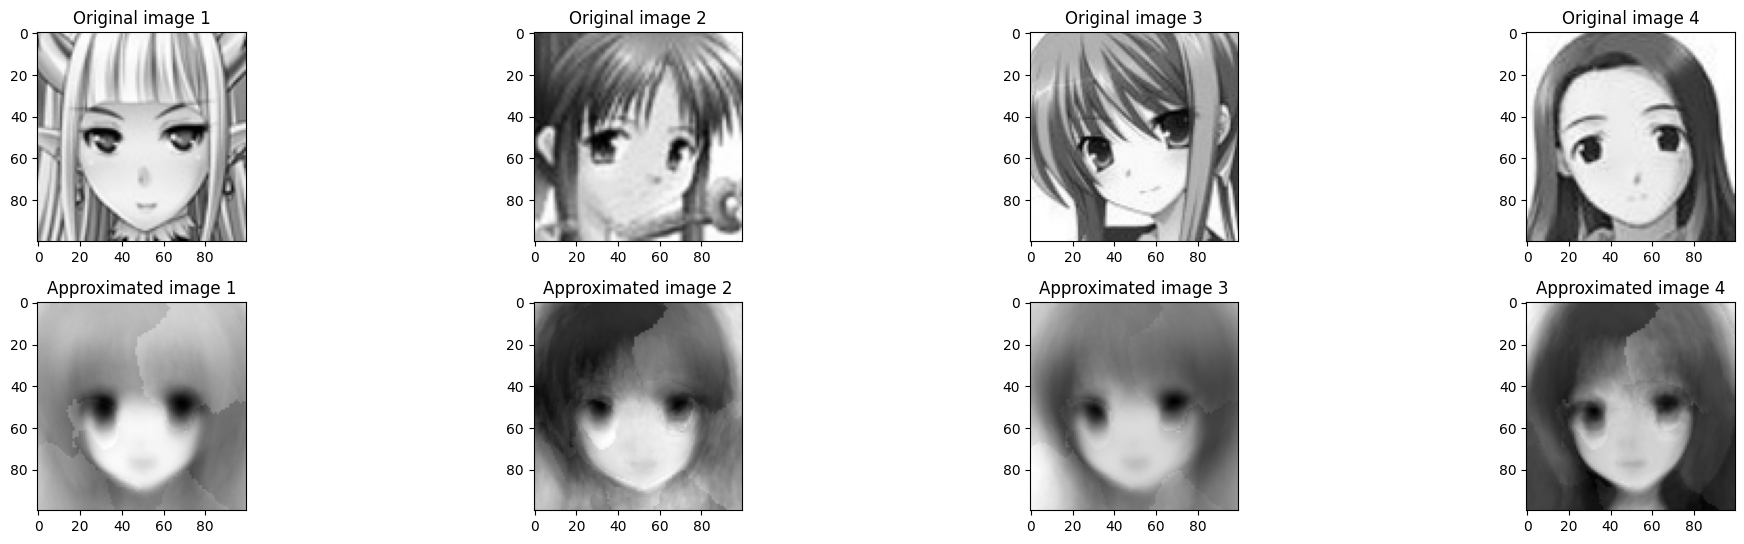

In [ ]:
plt.figure(figsize=(20,8))

for i in range(1,5):
    # Original image
    plt.subplot(3, 4, i)
    reshape_row(X[i])
    plt.title(f"Original image {i}")

    # Inverse transformed image
    plt.subplot(3, 4, i+4)
    reshape_row(Xhat[i])
    plt.title(f"Approximated image {i}")
plt.tight_layout()

We can verify that the scikit-learn's **inverse_transform** method essentially performs the following matrix operation:


In [ ]:
Xhat_M = W @ H
Xhat_M.shape

(9000, 10000)

In [ ]:
Xhat[0], Xhat_M[0]

(array([220.37010654, 215.91930544, 212.74932786, ..., 176.60204985,
        176.1854968 , 177.63230777]),
 array([220.37010654, 215.91930544, 212.74932786, ..., 176.60204985,
        176.1854968 , 177.63230777]))

We see the results are identical quantitatively (for the first 10 grayscale values of first image):


In [ ]:
np.array_equal(Xhat[0,:10], Xhat_M[0,:10])

True

In [ ]:
np.equal(Xhat[0,:10], Xhat_M[0,:10])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

and qualitatively or visually for the second to fifth image in the dataset:


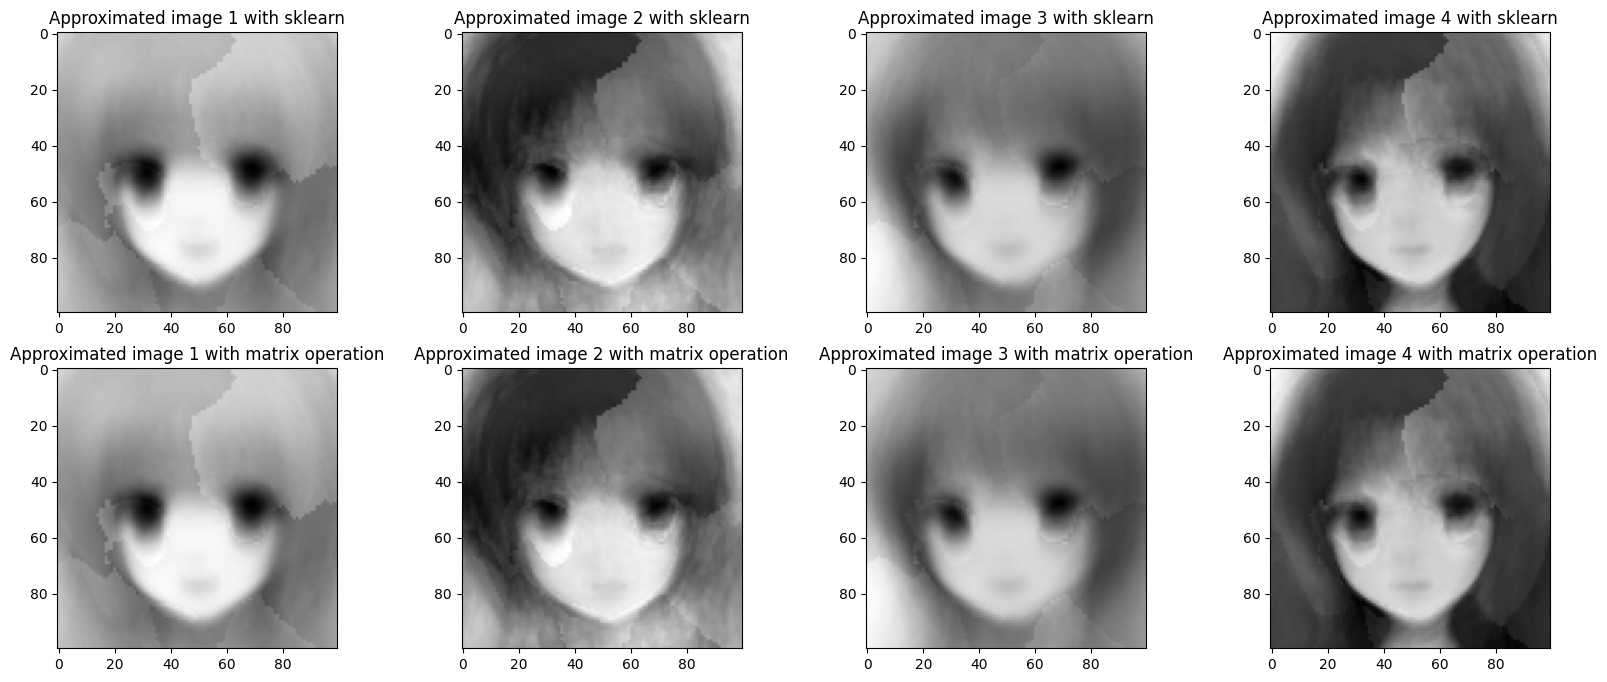

In [ ]:
plt.figure(figsize=(20,8))

for i in range(1, 5):
  plt.subplot(2, 4, i)
  reshape_row(Xhat[i])
  plt.title(f"Approximated image {i} with sklearn")

  plt.subplot(2, 4, i+4)
  reshape_row(Xhat_M[i])
  plt.title(f"Approximated image {i} with matrix operation")

We can reconstruct the image by adding one component multiplied by it's encoding at a time. This is shown in the following lines of code, as each successive component is added we see the image looks more and more like it's approximation:


In [ ]:
np.where(w > 0) # indices values for correct conditions

(array([0, 1, 2, 4, 7, 8, 9]),)

In [ ]:
image = np.zeros((1, 10000))
for i, (w_, h) in enumerate(zip(w, H)):
    # print("w_ value:", w_)
    # print("h value:", h)
    image += w_ * h
    print(f"{i}. {image}") # indices: [0, 3, 4, 5, 8, 9]
# The image values will be changed as per indices accordingly.
# [0, 3, 4, 5, 8, 9]

0. [[ 8.44857715  8.11819865  7.37389037 ... 12.7152782  12.81951645
  12.8058467 ]]
1. [[ 8.44857715  8.11819865  7.37389037 ... 12.7152782  12.81951645
  12.8058467 ]]
2. [[51.43062379 50.23121444 48.90076652 ... 12.7152782  12.81951645
  12.8058467 ]]
3. [[51.43062379 50.23121444 48.90076652 ... 12.7152782  12.81951645
  12.8058467 ]]
4. [[51.43062379 50.23121444 48.90076652 ... 12.88031396 12.81951645
  12.82293932]]
5. [[51.43062379 50.23121444 48.90076652 ... 12.88031396 12.81951645
  12.82293932]]
6. [[51.43062379 50.23121444 48.90076652 ... 12.88031396 12.81951645
  12.82293932]]
7. [[78.14231967 76.40118752 74.32757059 ... 53.10119403 51.34976703
  50.57142861]]
8. [[176.908169   172.75790786 169.97071287 ... 140.04656115 139.06679034
  140.23762954]]
9. [[220.37010654 215.91930544 212.74932786 ... 176.60204985 176.1854968
  177.63230777]]


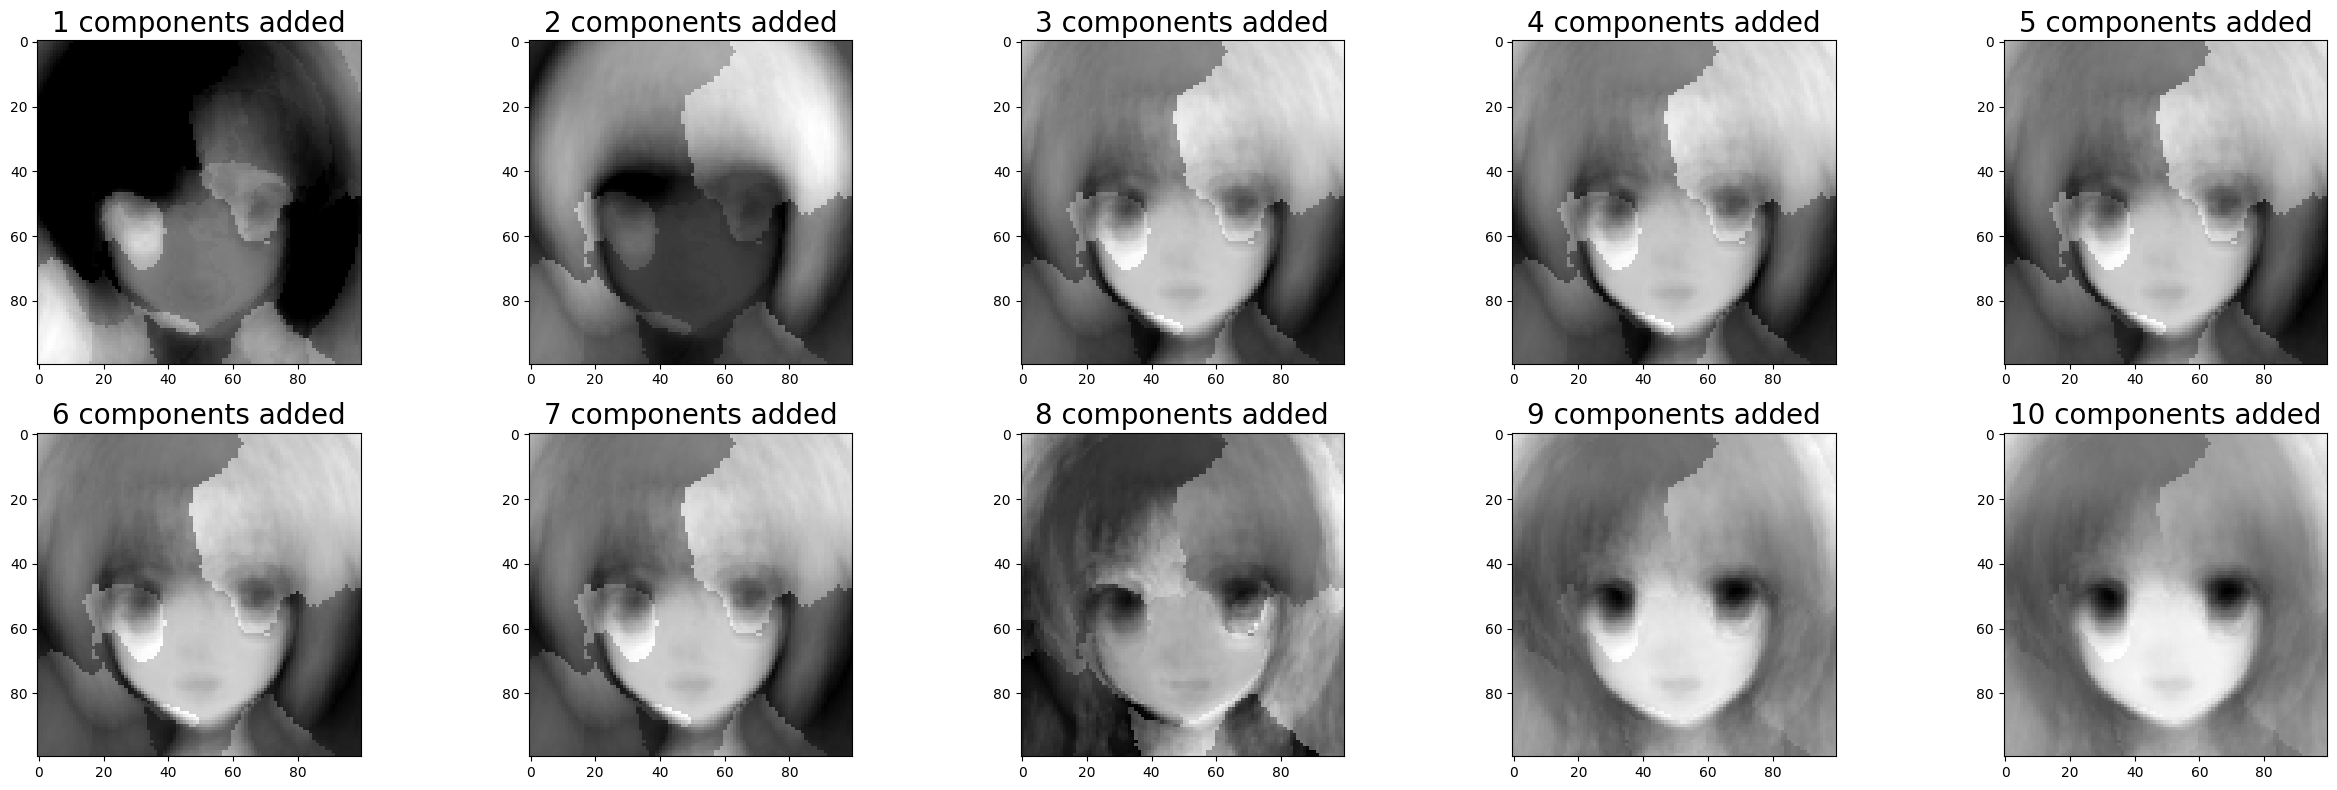

In [ ]:
# Initialize an image array with 10000 zeros which will be reshaped as 100 x 100
image = np.zeros((1, 10000))

plt.figure(figsize=(25, 8))
for i, (w_, h) in enumerate(zip(w, H)):
  # w is the encoding vector of the first image in X
  # reconstruction of the image is a linear combination of H
  plt.subplot(2, 5, i+1)
  # Reconstructs the full image step-by-step (linear combination)
  image += w_ * h
  reshape_row(image)
  plt.title(f"{i+1} components added", fontsize=20)
plt.tight_layout()

## Image Retrieval System


An image retrieval system is a system used for browsing, searching and retrieving images from a large database of digital images. In this section we will create an image retrieval system to find similar cartoon characters for copyright infringement.

We define the query dataset as the set of 1000 images. If these images are similar to the images in our original dataset, they may be considered as copyright infringement. We load the query dateset into```X_q``` where each row corresponds to a flattened $100\times 100$ image:


In [ ]:
X_q = get_data_matrix(test=True, Length=100, Width=100, mypath="images")
X_q.shape

test data
1000


(1000, 10000)

The code in the next cell helps us retain much of the important information of the query images and reduces factors that make similar images appear differently such as noise, rotation and scale. In addition, the code results in a matrix `W_q` that requires less computation for calculating the distance metrics. As such we will use the code to find the similar images.


In [ ]:
W_q = nmf_estimator.transform(X_q)
W_q.shape

(1000, 10)

We define  the  distance matrix as a  matrix ```D``` containing the distances, taken pairwise, between the elements of the query dataset and the original dataset.  We will use the cosine similarity that computes the normalized dot product of vectors. That is, for $x$ and $x'$ their `cosine distance`  is defined as:

$$1-\frac{x' x^T}{\|x'\| \|x\|}$$


- the closer the distance is to 0, the more similar they are.  

Consider the following set of codes in which case that we represent as 2D vectors.  The original  dataset is in yellow and the query dataset is in blue. We see that the image $h_2$ is nearest  to  $h_{2q}$, and similarly image $h_3$ is nearest  to  $h_{1q}$.



<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/NNMF_vectors.png" width="500" alt="https://pxhere.com/en/photo/1536663">


The resultant distance Matrix is shown below, each row consists of a dataset sample and each column consists of a query dataset sample. Each element of the distance Matrix comprises of the distance between the sample of that particular row and that particular column. We see in this case samples that are close together have the smallest  value. For example, image $h_2$  in the second row is nearest to $h_{2q}$ in the second column.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/Sim_Matix.png" width="500" alt="https://pxhere.com/en/photo/1536663">


We will use the function ```pairwise_distances``` from scikit-learn. This method takes either a vector array or a distance matrix, and returns a distance matrix. If the input is a vector array, the distances are computed.


In [ ]:
from sklearn.metrics import pairwise_distances

In [ ]:
# calculates the pairwise distance between the NNMF encoded version of
# the original dataset W and the encoded version of the query dataset W_q
# W = transformed data from X, which is training data (shape: (9000, 10))
# W_q = transformed data from X_q, which is testing data (shape: (1000, 10))
# NMF(max_iter=2000, n_components=10, tol=0.005)
D = pairwise_distances(W, W_q, metric='cosine') # cosine distance

We see the number of rows corresponds to the number of samples in the original dataset and the number of columns  corresponds to the number of samples in the query dateset.


In [ ]:
D.shape

(9000, 1000)

For each sample in the dataset we find the query sample that has the smallest distance to it, which would be the most similar image. As each image in the original dataset corresponds to a row in the distance matrix, the column index with smallest value corresponds to the index of the closest image in the query dataset.


In [ ]:
# Finds indices of the smallest distances
similar_index = np.argmin(D, axis=1)
len(similar_index)

9000

We also find the corresponding distance value


In [ ]:
# Querys smallest distance values
similar_distance = np.min(D, axis=1)
len(similar_distance)

9000

In [ ]:
similar_index.min()

np.int64(0)

In [ ]:
similar_distance.min()

np.float64(0.0)

We plot out the distance values in a histogram; we see the values range from zero to approximately 0.06.


Text(0.5, 1.0, 'Distance values')

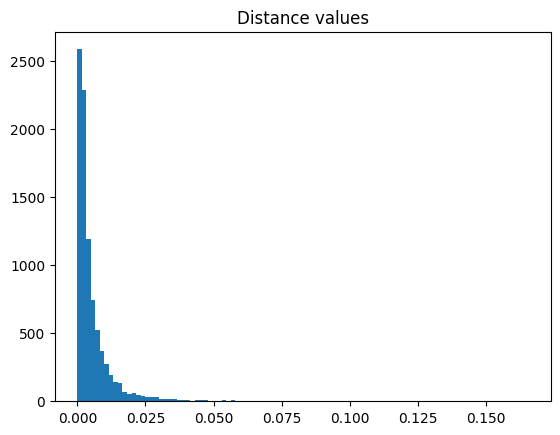

In [ ]:
plt.hist(similar_distance, bins=100)
plt.title("Distance values")

If we try a maximum threshold of $1.0x10^{-5}$ for the distance value for the first five samples, we get identical images


Test `def threshold()` function:

In [ ]:
min_, max_ = 0, 0.00001

In [ ]:
mask = (similar_distance > min_) & (similar_distance < max_)
mask

array([False, False, False, ..., False, False, False])

In [ ]:
# Get the indices numbers if the condition is true
np.where(mask)[0]

array([ 230,  470, 1643, 1831, 2197, 2875, 3116, 3241, 3497, 3561, 3604,
       3780, 4106, 4427, 4823, 5054, 5263, 5554, 5556, 5753, 5915, 6707,
       7791, 7909, 8396, 8689, 8772])

In [ ]:
similar_index[mask]

array([100, 840, 585, 276, 633, 595, 595, 989, 793, 560, 762, 288, 787,
        86, 194, 175, 965, 754, 381, 816, 761, 764, 875, 170, 549,  92,
        64])

In [ ]:
help(threshold)

Help on function threshold in module __main__:

threshold(similar_distance, max_=0.1, min_=0)
    Get indices of the similar_distance and similar_index data based on similar_distance
    between the defined range (min_ and max_ values).
    --> Return dataset_index and query_index.



In [ ]:
dataset_index, query_index = threshold(similar_distance, max_=0.00001, min_=0)

In [ ]:
dataset_index.shape, query_index.shape

((27,), (27,))

In [ ]:
dataset_index[:10]

array([ 230,  470, 1643, 1831, 2197, 2875, 3116, 3241, 3497, 3561])

In [ ]:
query_index[:10]

array([100, 840, 585, 276, 633, 595, 595, 989, 793, 560])

If we try a threshold of between $5.0x10^{-3}$ and $1.0x10^{-2}$ instead and plot out the first five samples, it is evident the many of the query images are very different from the original.


In [ ]:
help(reshape_row)

Help on function reshape_row in module __main__:

reshape_row(x)
    Shows image reshaping (Length, Width) in grayscale.
    --> Return image.



In [ ]:
help(plot_data_query)

Help on function plot_data_query in module __main__:

plot_data_query(dataset_index, query_index, N)
    Visualizes between training data and testing data based on
    dataset_index and query_index data with N samples.
    - figure_size: (10, 4)
    - figure_grid: (2, 2)
    --> Return image.



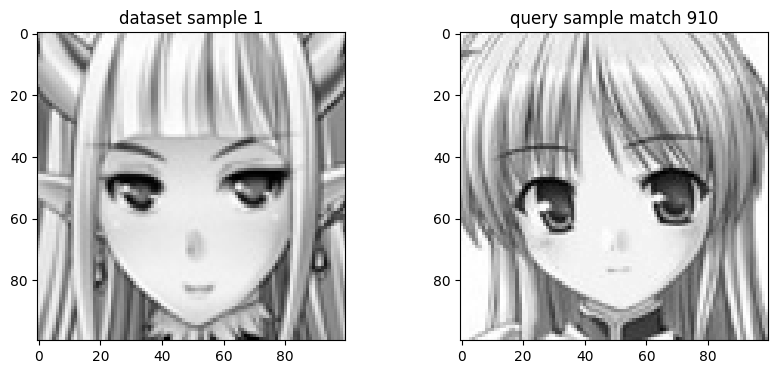

------------------------------------------------------------------------------------------


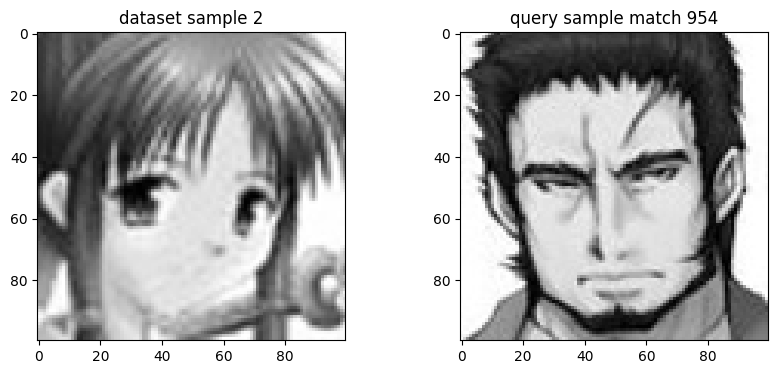

------------------------------------------------------------------------------------------


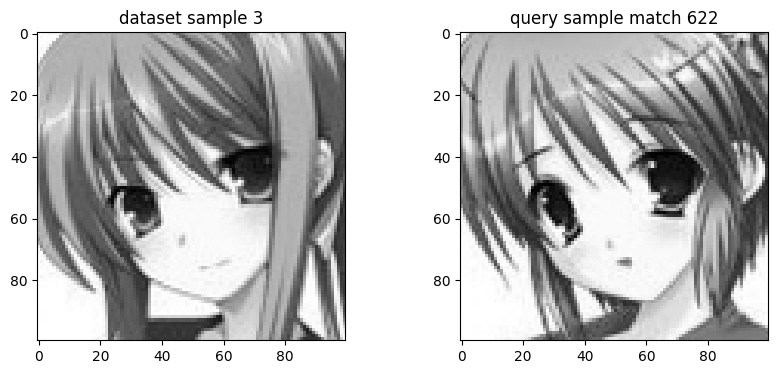

------------------------------------------------------------------------------------------


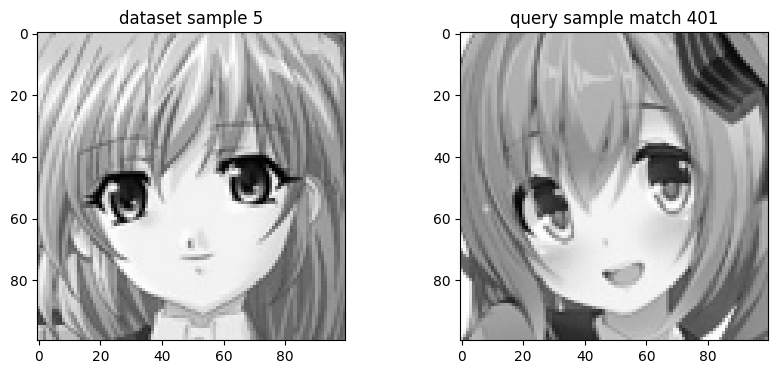

------------------------------------------------------------------------------------------


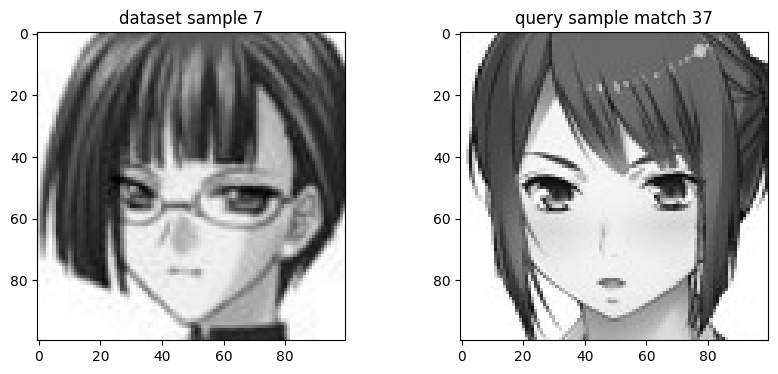

------------------------------------------------------------------------------------------


In [ ]:
dataset_index, query_index = threshold(similar_distance, max_=0.005, min_=0.00001)
plot_data_query(dataset_index, query_index, 5)

## Exercises


In this exercise, you will apply NMF on the [face images](https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py) from scikit-learn and perform an image retrievel task to find pairs of faces that are similar.


In [33]:
from sklearn.datasets import fetch_olivetti_faces

In [34]:
rng = RandomState(0)
data = fetch_olivetti_faces(shuffle=True, random_state=rng)
X = data.images

In [35]:
image_shape = (64, 64)

We use the **plot_faces** function to plot the first 6 faces in the dataset.


In [36]:
help(plot_faces)

Help on function plot_faces in module __main__:

plot_faces(title, images, n_col, n_row, cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x7f1eefdac5d0>)
    Visualize grayscale images in an (n_row, n_col) grid with a horizontal colorbar.
    --> Return image.



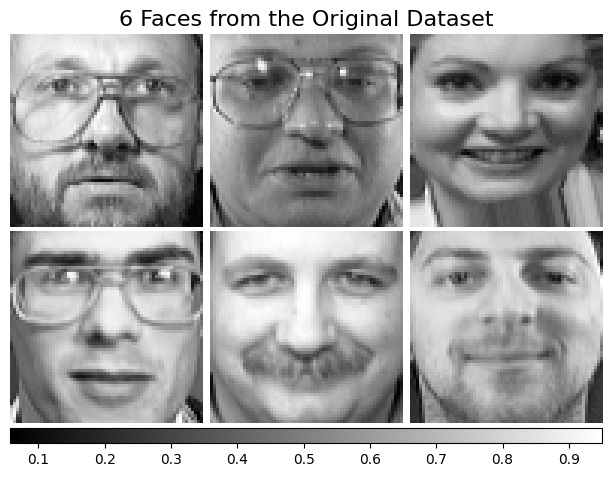

In [37]:
plot_faces("6 Faces from the Original Dataset", X[:6], 3, 2)

### Exercise 1

Split the dataset into two such that the first 300 is used as the original dataset **X_r** and the remaining 100 is used as the query dataset **X_q**. Initialize a NMF instance with n_components = 10, and use it to transform **X_r** and **X_q** into encodings.


In [38]:
# Need to change 2D before fitting.
X_r = X[:300].reshape((300, 64 * 64))  # shape: (300, 4096)
X_q = X[300:].reshape((100, 64 * 64))  # shape: (100, 4096)

In [39]:
nmf = NMF(n_components=10, tol=5e-3, max_iter=2000)
X_r_w = nmf.fit_transform(X_r) # shape: (300, 10)
X_q_w = nmf.transform(X_q) # shape: (100, 10)

In [40]:
X_r.shape, X_q.shape, X_r_w.shape, X_q_w.shape

((300, 4096), (100, 4096), (300, 10), (100, 10))

<details>
    <summary>Click here for Solution</summary>

```python
nmf = NMF(n_components=6, tol=5e-3,max_iter=2000)
nmf.fit(X)
```

</details>


### Exercise 2

Calculate the pairwise distances between face encodings from the original and query dataset, store the result in **D**.


In [41]:
from sklearn.metrics import pairwise_distances

In [42]:
D = pairwise_distances(X_r_w, X_q_w, metric='cosine') # shape: (300, 100)

In [43]:
X_r_w[2]

array([0.08577573, 0.02720673, 0.        , 0.03637931, 0.        ,
       0.35725793, 0.04266966, 0.18015091, 0.08244088, 0.40860987],
      dtype=float32)

In [44]:
X_q_w[2]

array([0.0076781 , 0.05289651, 0.02944149, 0.        , 0.10203907,
       0.        , 0.00622968, 0.5540617 , 0.17704357, 0.45353377],
      dtype=float32)

In [45]:
D[2] # 100 items

array([0.13720429, 0.12349349, 0.31169444, 0.09660345, 0.26200944,
       0.21560639, 0.31661505, 0.32433426, 0.20431161, 0.2814535 ,
       0.25687855, 0.2762457 , 0.04620367, 0.1507166 , 0.21418148,
       0.31606722, 0.23410493, 0.18495488, 0.21349502, 0.32640225,
       0.21838051, 0.3746934 , 0.2590313 , 0.32983422, 0.12727523,
       0.20694476, 0.22251916, 0.11493349, 0.06551307, 0.3171066 ,
       0.29911637, 0.14928567, 0.301468  , 0.28496927, 0.20794469,
       0.2053929 , 0.12098116, 0.11947703, 0.30167115, 0.08984435,
       0.30308658, 0.37168992, 0.24242467, 0.39037824, 0.27205813,
       0.1216051 , 0.04918259, 0.25771922, 0.18566775, 0.25283563,
       0.33659434, 0.18609637, 0.3595407 , 0.13015693, 0.2137152 ,
       0.3407815 , 0.1767785 , 0.23614705, 0.3694713 , 0.08863318,
       0.15810072, 0.3762148 , 0.09870607, 0.28597814, 0.17416704,
       0.2297349 , 0.3319518 , 0.16124618, 0.19522691, 0.291359  ,
       0.12012142, 0.29602152, 0.2897629 , 0.2653883 , 0.14512

### Exercise 3

For all rows in the pairwise distance matrix, output their smallest distances as **similar_distance**, and the index associated with the smallest distances as **similar_index**.


In [46]:
# For each query image (i.e., each column), find the index of the closest match
# Choose minimum value from each column in 100 columns
# Result one values for 300 rows
similar_index = np.argmin(D, axis=1)   # shape: (300,) -- indices
similar_distance = np.min(D, axis=1)   # shape: (300,) -- distances

In [47]:
similar_index.shape, similar_distance.shape

((300,), (300,))

In [48]:
similar_index[2], similar_distance[2]

(np.int64(78), np.float32(0.040441513))

In [49]:
D[:, 2]

array([0.22214538, 0.4633599 , 0.31169444, 0.1073854 , 0.11302924,
       0.21274865, 0.42303056, 0.2478633 , 0.14394212, 0.1250596 ,
       0.1033504 , 0.1589356 , 0.16321075, 0.01680982, 0.42072695,
       0.17281055, 0.21996504, 0.2906382 , 0.02502292, 0.20922476,
       0.16976613, 0.20625746, 0.12163901, 0.00286239, 0.10166138,
       0.4523595 , 0.08773381, 0.44724643, 0.02772641, 0.15201575,
       0.19579262, 0.4663692 , 0.40436   , 0.03975689, 0.1981439 ,
       0.37044603, 0.0965026 , 0.17172211, 0.12101084, 0.0823521 ,
       0.18858033, 0.32502687, 0.3624192 , 0.4543082 , 0.25552154,
       0.14523423, 0.1484049 , 0.07336259, 0.30348665, 0.1887573 ,
       0.0577845 , 0.09828591, 0.20747864, 0.2169568 , 0.08366007,
       0.3375231 , 0.23069954, 0.38718134, 0.02639019, 0.06921238,
       0.22646087, 0.04108655, 0.1597076 , 0.22515494, 0.28676718,
       0.14651322, 0.27008486, 0.16774774, 0.14394993, 0.37181395,
       0.13710487, 0.26978636, 0.1744985 , 0.09199792, 0.27028

<details>
    <summary>Click here for Solution</summary>

```python
W = nmf.transform(X)
w6 = W[:6, :] # picking the first 6 encodings

X_hat = nmf.inverse_transform(w6)
plot_faces("6 Reconstructed faces using inverse_transform", X_hat, 3, 2)

```

</details>


### Exercise 4

Use the **similar_distance** as input for the **threshold** function. You can specify the min and max threshold for the distances. Return the index of the original dataset and the query dataset that satisfy the specified threshold. Use **plot_data_query** to plot the first 5 pairs of face images that our image retrieval system "views" as similar.


In [50]:
help(threshold)

Help on function threshold in module __main__:

threshold(similar_distance, max_=0.1, min_=0)



In [51]:
help(plot_data_query)

Help on function plot_data_query in module __main__:

plot_data_query(dataset_index, query_index, N)
    Visualizes between training data and testing data based on
    dataset_index and query_index data with N samples.
    - figure_size: (10, 4)
    - figure_grid: (2, 2)
    --> Return image.



In [52]:
def threshold(similar_distance,max_=0.1,min_=0):
    dataset_index=np.where(np.logical_and(similar_distance>min_ ,similar_distance<max_))[0]
    query_index=similar_index[np.logical_and(similar_distance>min_ ,similar_distance<max_)]
    return dataset_index,query_index

In [53]:
o_index, q_index = threshold(similar_distance)
o_index.shape, q_index.shape

((298,), (298,))

In [54]:
o_index, q_index

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        171, 172, 173, 174, 175, 176, 177, 178, 179

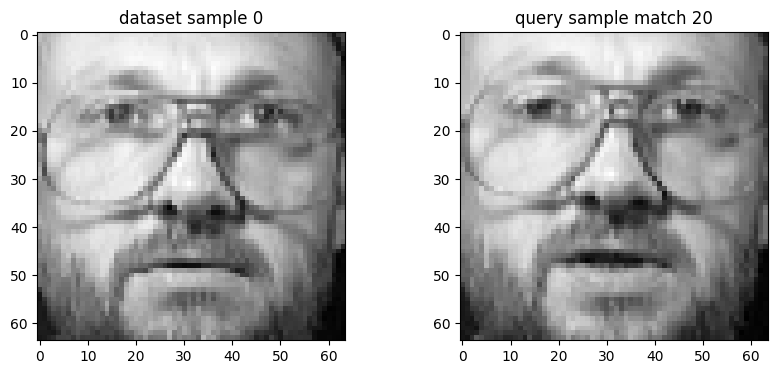

------------------------------------------------------------------------------------------


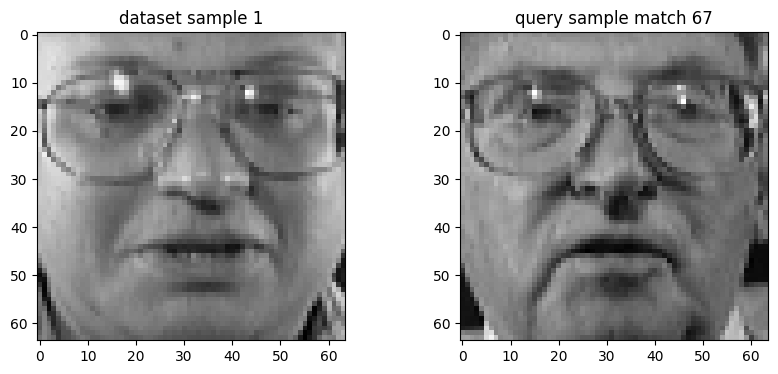

------------------------------------------------------------------------------------------


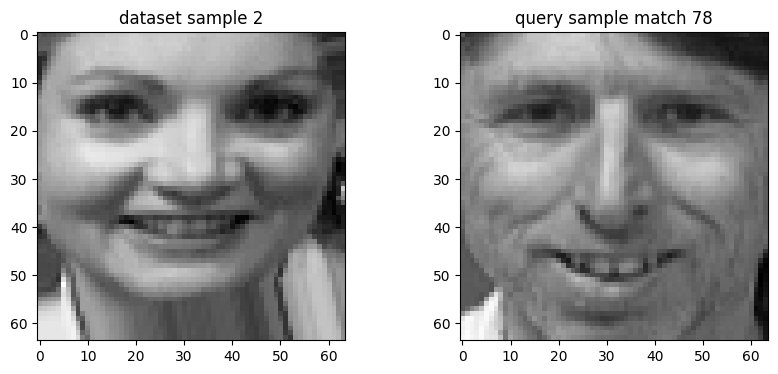

------------------------------------------------------------------------------------------


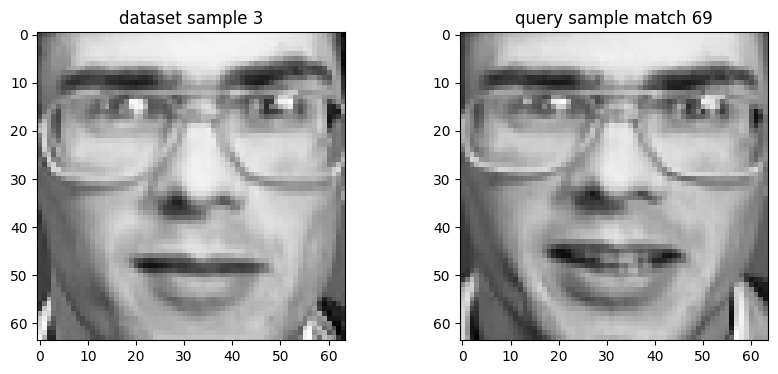

------------------------------------------------------------------------------------------


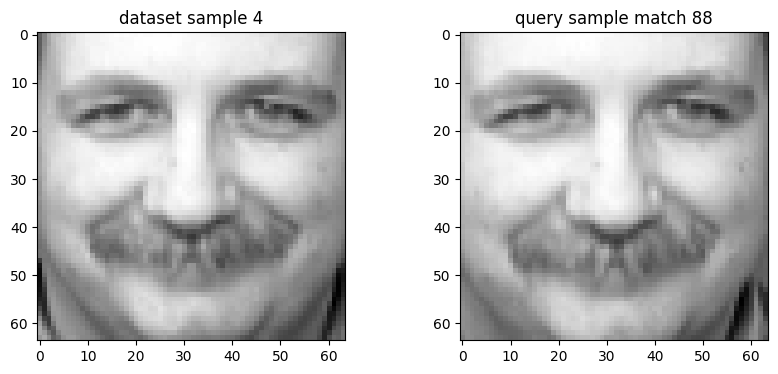

------------------------------------------------------------------------------------------


In [55]:
Length = 64
Width = 64
plot_data_query(o_index, q_index, 5)

<details>
    <summary>Click here for Solution</summary>

```python
X_hat_M = w6@H
plot_faces("6 Reconstructed faces using matrix operations", X_hat_M, 3,2)
print("-------------------------------------------------------")
plot_faces("6 Reconstructed faces using inverse_transform", X_hat, 3, 2)
```

</details>


# Congratulations! - You have completed the lab


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Joseph Santarcangelo</a> Joseph has a Ph.D. in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

[Roxanne Li](https://www.linkedin.com/in/roxanne-li/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) is a Data Science intern at IBM Skills Network, entering level-5 study in the Mathematics & Statistics undergraduate Coop program at McMaster University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By  | Change Description             |
| ----------------- | ------- | ----------- | ------------------------------ |
| 2022-03-25        | 0.1     | Joseph S.   | Updated all content            |
| 2022-04-26        | 0.1     | Svitlana K. | Corrected minor grammar errors |
| 2022-06-06        | 0.1     | Roxanne Li  | Review and edit content        |
